# Prediction of sepsis before conventional methods

## 1)Used Machine Learning Gradient Boosting Classifier
## 2)Used Deep Learning Neural Network Architecture

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline

Dataset Loading

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


Get information about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

Get information of missing values in each column

In [5]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Unnamed: 0                0
Hour                      0
HR                   153399
O2Sat                202736
Temp                1026984
SBP                  226265
MAP                  193270
DBP                  486554
Resp                 238335
EtCO2               1494574
BaseExcess          1468065
HCO3                1487182
FiO2                1422845
pH                  1444637
PaCO2               1465909
SaO2                1498649
AST                 1527027
BUN                 1445642
Alkalinephos        1527269
Calcium             1460879
Chloride            1481744
Creatinine          1457594
Bilirubin_direct    1549220
Glucose             1286694
Lactate             1510764
Magnesium           1454259
Phosphate           1489909
Potassium           1407685
Bilirubin_total     1529069
TroponinI           1537429
Hct                 1414777
Hgb                 1437619
PTT                 1506511
WBC                 1452763
Fibrinogen      

To remove the first column as it is of no use

In [6]:
df = df.drop(df.columns[0], axis=1)


In [7]:
df.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

Data Preprocessing

In [8]:
# First convert all columns to numeric, coercing errors to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    

In [9]:
df.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 43 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Hour              1552210 non-null  int64  
 1   HR                1398811 non-null  float64
 2   O2Sat             1349474 non-null  float64
 3   Temp              525226 non-null   float64
 4   SBP               1325945 non-null  float64
 5   MAP               1358940 non-null  float64
 6   DBP               1065656 non-null  float64
 7   Resp              1313875 non-null  float64
 8   EtCO2             57636 non-null    float64
 9   BaseExcess        84145 non-null    float64
 10  HCO3              65028 non-null    float64
 11  FiO2              129365 non-null   float64
 12  pH                107573 non-null   float64
 13  PaCO2             86301 non-null    float64
 14  SaO2              53561 non-null    float64
 15  AST               25183 non-null    float64
 16  

In [11]:
#To replace the missing values, we will use the mean of the column
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df_imputed.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0.0,84.581443,97.193955,36.977228,123.750465,82.4001,63.830556,18.726498,32.957657,-0.689919,...,287.385706,196.013911,68.54,0.0,0.496571,0.503429,-0.02,1.0,0.0,17072.0
1,1.0,65.000000,100.000000,36.977228,123.750465,72.0000,63.830556,16.500000,32.957657,-0.689919,...,287.385706,196.013911,68.54,0.0,0.496571,0.503429,-0.02,2.0,0.0,17072.0
2,2.0,78.000000,100.000000,36.977228,123.750465,42.5000,63.830556,18.726498,32.957657,-0.689919,...,287.385706,196.013911,68.54,0.0,0.496571,0.503429,-0.02,3.0,0.0,17072.0
3,3.0,73.000000,100.000000,36.977228,123.750465,82.4001,63.830556,17.000000,32.957657,-0.689919,...,287.385706,196.013911,68.54,0.0,0.496571,0.503429,-0.02,4.0,0.0,17072.0
4,4.0,70.000000,100.000000,36.977228,129.000000,74.0000,69.000000,14.000000,32.957657,-0.689919,...,287.385706,330.000000,68.54,0.0,0.496571,0.503429,-0.02,5.0,0.0,17072.0


Creation of Independent and Dependent Variables

In [12]:
X = df_imputed.drop('SepsisLabel', axis=1)
y = df_imputed['SepsisLabel']
    

Train-Test split

In [14]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
print(y_train.value_counts())

0.0    1219391
1.0      22377
Name: SepsisLabel, dtype: int64


Handling unbalanced data

In [16]:
from imblearn.over_sampling import SMOTE
# If there's class imbalance, apply SMOTE
if y_train.value_counts().min() / y_train.value_counts().sum() < 0.2:
    print("\nApplying SMOTE to handle class imbalance...")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print("After SMOTE, class distribution:")
    print(pd.Series(y_train_resampled).value_counts())
else:
    X_train_resampled, y_train_resampled = X_train, y_train


Applying SMOTE to handle class imbalance...
After SMOTE, class distribution:
0.0    1219391
1.0    1219391
Name: SepsisLabel, dtype: int64


## Gradient Boosting Model

In [17]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [18]:
print("\nTraining a Gradient Boosting Classifier...")
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_model.fit(X_train_scaled, y_train_resampled)


Training a Gradient Boosting Classifier...


GradientBoostingClassifier(n_estimators=50, random_state=42)

In [24]:
print("\nEvaluating model on test set...")
y_pred = gb_model.predict(X_test_scaled)


Evaluating model on test set...


In [25]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96    304903
         1.0       0.10      0.36      0.15      5539

    accuracy                           0.93    310442
   macro avg       0.54      0.65      0.56    310442
weighted avg       0.97      0.93      0.95    310442



In [26]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[286270  18633]
 [  3555   1984]]


In [27]:
#the predicted probabilities of the positive class
y_pred_proba = gb_model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.7431


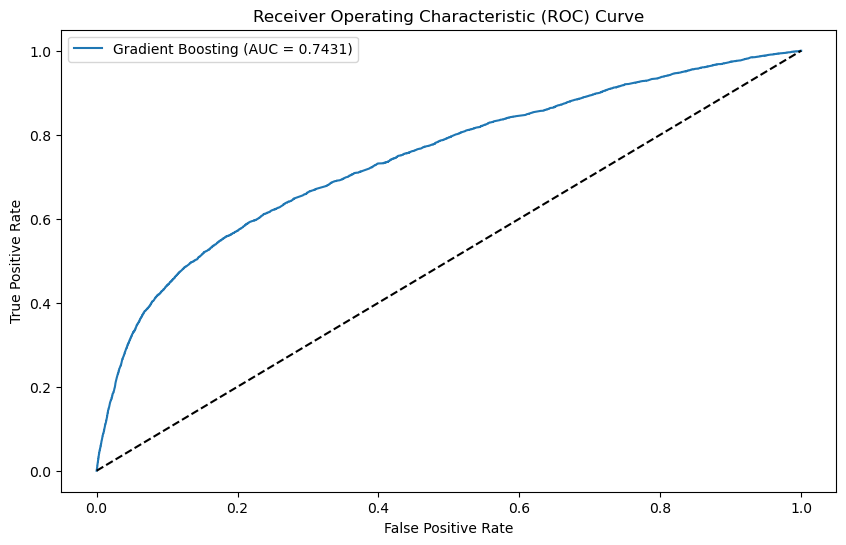

In [28]:
plt.figure(figsize=(10, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # random prediction curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [29]:
import pickle
print("\nSaving model as 'sepsis_prediction_model.pkl'...")
with open('sepsis_prediction_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)

print("\nModel development complete!")


Saving model as 'sepsis_prediction_model.pkl'...

Model development complete!


## Neural Network

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [36]:
n_features = X_train_scaled.shape[1]

In [37]:
model = Sequential([
    # Input layer
    Dense(128, activation='relu', input_shape=(n_features,)),
    BatchNormalization(),
    Dropout(0.3),
    
    # Hidden layer 1
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    # Hidden layer 2
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    # Output layer - binary classification
    Dense(1, activation='sigmoid')
])


c:\Users\Nidhi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,385 (64.00 KB)

 Trainable params: 15,937 (62.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [44]:
early_stopping = EarlyStopping(
    monitor='val_auc',
    patience=3,
    mode='max',
    restore_best_weights=True
)

In [45]:
history = model.fit(
    X_train_scaled, 
    y_train_resampled,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20
60970/60970 ━━━━━━━━━━━━━━━━━━━━ 430s 7ms/step - accuracy: 0.8495 - auc: 0.9015 - loss: 0.3582 - val_accuracy: 0.7274 - val_auc: 0.0000e+00 - val_loss: 0.4887
Epoch 2/20
60970/60970 ━━━━━━━━━━━━━━━━━━━━ 290s 5ms/step - accuracy: 0.8506 - auc: 0.9025 - loss: 0.3559 - val_accuracy: 0.7423 - val_auc: 0.0000e+00 - val_loss: 0.4530
Epoch 3/20
60970/60970 ━━━━━━━━━━━━━━━━━━━━ 143s 2ms/step - accuracy: 0.8512 - auc: 0.9032 - loss: 0.3545 - val_accuracy: 0.7321 - val_auc: 0.0000e+00 - val_loss: 0.4769
Epoch 4/20
60970/60970 ━━━━━━━━━━━━━━━━━━━━ 158s 3ms/step - accuracy: 0.8525 - auc: 0.9052 - loss: 0.3516 - val_accuracy: 0.7411 - val_auc: 0.0000e+00 - val_loss: 0.4588


In [46]:
print("\nEvaluating model on test set...")
test_loss, test_accuracy, test_auc = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")



Evaluating model on test set...
9702/9702 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9377 - auc: 0.7696 - loss: 0.2480
Test Accuracy: 0.9381
Test AUC: 0.7719


In [47]:
# Make predictions
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

9702/9702 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


In [48]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97    304903
         1.0       0.11      0.33      0.16      5539

    accuracy                           0.94    310442
   macro avg       0.55      0.64      0.56    310442
weighted avg       0.97      0.94      0.95    310442



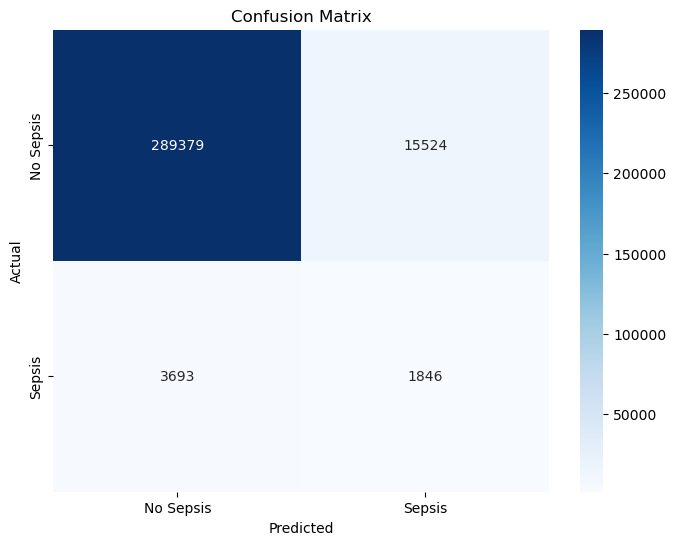

In [49]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Sepsis', 'Sepsis'],
            yticklabels=['No Sepsis', 'Sepsis'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

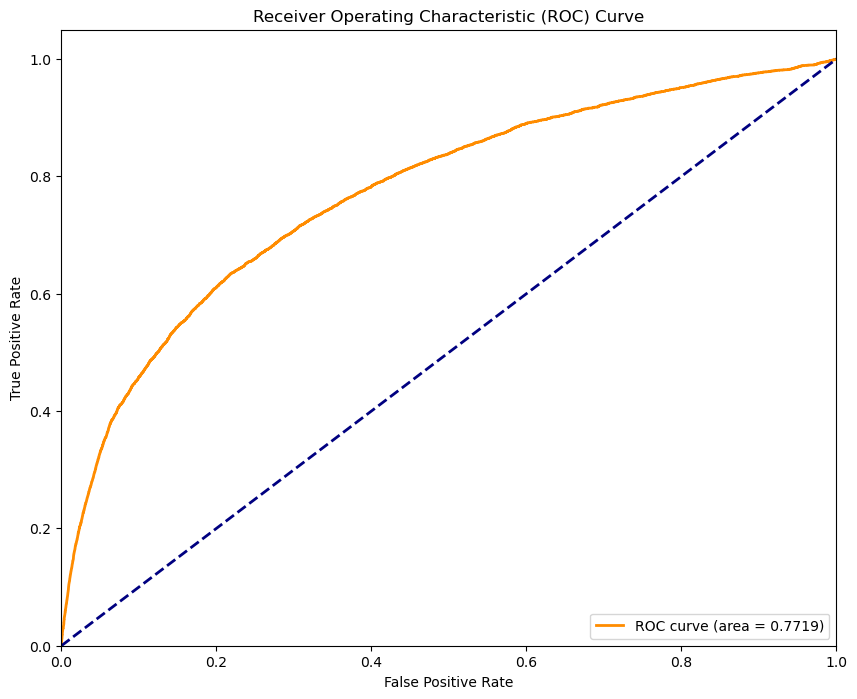

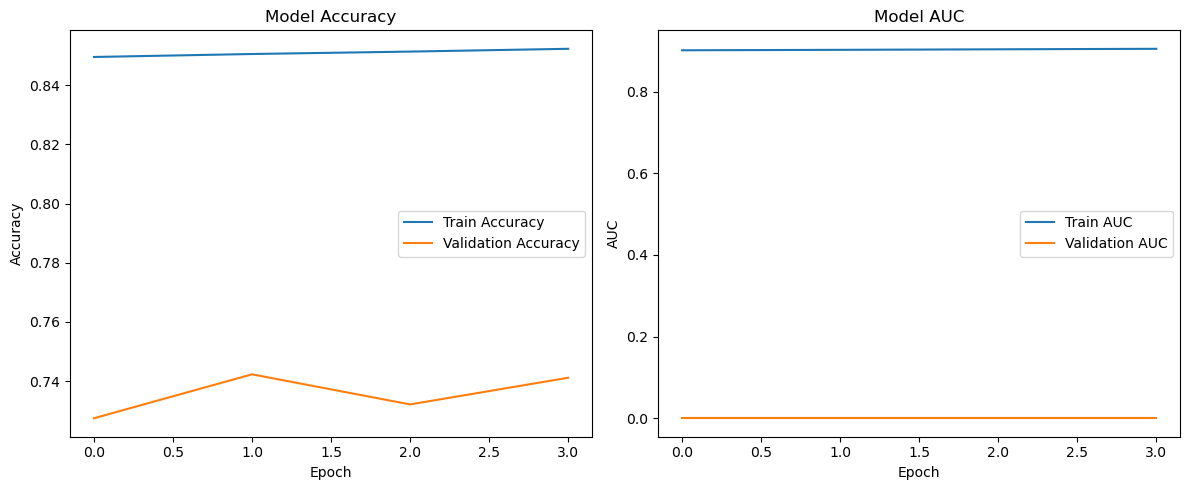

In [50]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# AUC plot
plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

In [56]:
print("\nSaving model as 'sepsis_nn_model.h5'...")
model.save('sepsis_nn_model.h5')


Saving model as 'sepsis_nn_model.h5'...


Accuracy of Gradient Boosting Model is  0.93 and ROC-AUC value is 0.7431 which states that it is a fair to good model.

Accuracy of Neural Network is 0.94  and ROC-AUC value is 0.7719 which states that it is a fair to good model.